In [48]:
# Voting Classifier used different ML models 

import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn import  datasets
data = datasets.load_iris()
import warnings
warnings.filterwarnings('ignore')

In [49]:
df = pd.DataFrame(data=data.data, columns=data.feature_names)
df['Species'] = pd.Series(data.target)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [50]:
df.shape

(150, 5)

In [51]:
df['Species'].value_counts()

0    50
1    50
2    50
Name: Species, dtype: int64

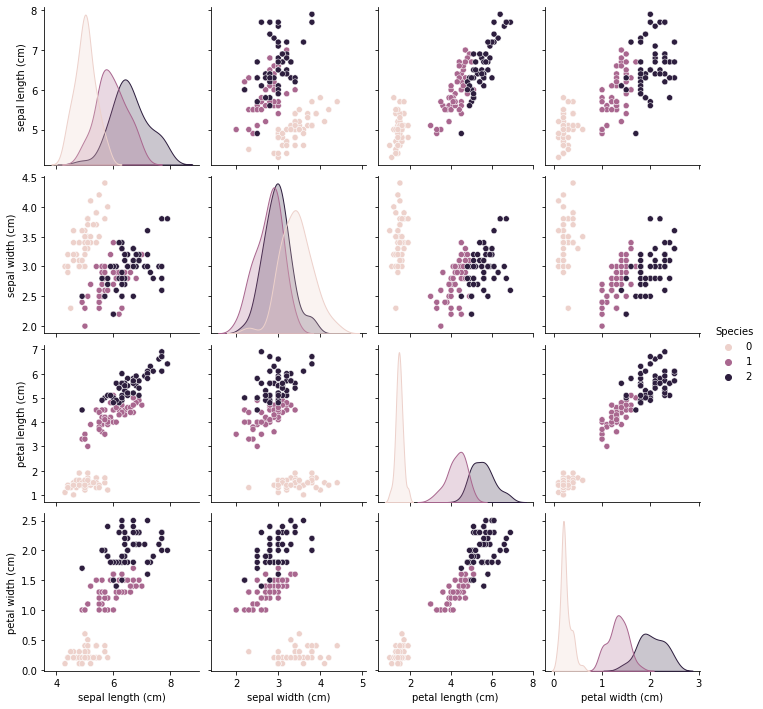

In [52]:
sns.pairplot(data=df,hue='Species')


### To make the classification problem more difficult we will only work on 2 features such as sepal length and width

### As from the diagram ,  we can see the scatter plot of sepal length and width are overlapping.


In [57]:
new_df = df[df['Species'] != 0]
new_df.head()

,sepal length (cm),sepal width (cm),Species
0,7.0,3.2,1
1,6.4,3.2,1
2,6.9,3.1,1
3,5.5,2.3,1
4,6.5,2.8,1


In [58]:
new_df = df[['sepal length (cm)','sepal width (cm)','Species']]

In [60]:
new_df.reset_index(drop=True,inplace=True)
new_df

,sepal length (cm),sepal width (cm),Species
0,7.0,3.2,1
1,6.4,3.2,1
2,6.9,3.1,1
3,5.5,2.3,1
4,6.5,2.8,1
...,...,...,...
95,6.7,3.0,2
96,6.3,2.5,2
97,6.5,3.0,2
98,6.2,3.4,2


In [67]:
X=new_df.iloc[:,0:2]
y=new_df.iloc[:,-1]
X

,sepal length (cm),sepal width (cm)
0,7.0,3.2
1,6.4,3.2
2,6.9,3.1
3,5.5,2.3
4,6.5,2.8
...,...,...
95,6.7,3.0
96,6.3,2.5
97,6.5,3.0
98,6.2,3.4


In [68]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

In [78]:
clf1=LogisticRegression()
clf2=RandomForestClassifier()
clf3=KNeighborsClassifier()

estimators = [('linear_regression',clf1),
              ('random_forest',clf2),
              ('knn',clf3)]

In [79]:
for estimator in estimators:
    x=cross_val_score(estimator[1],X,y,cv=10,scoring='accuracy')
    print(estimator[0],np.round(np.mean(x),2))
    

linear_regression 0.75
random_forest 0.6
knn 0.62


### Hard Voting


In [81]:

# Hard Voting will work as normal voting .
# Check the o/p of all the model and take the mode .

from sklearn.ensemble import VotingClassifier

vc=VotingClassifier(estimators=estimators)
x=cross_val_score(vc,X,y,cv=10,scoring='accuracy')
print(np.round(np.mean(x),2))

0.67


### Soft Voting

In [82]:

# In soft voting , suppose there are 3 classes and 5 models

# model1 :  1-90 , 2- 8 , 3 - 2
# model2 :  1-10 , 2- 80 , 3 - 10
# model3 :  1-1 , 2-85,3-14
# model4 :  1-25, 2-65 , 3-10
# model5 :  1-5 , 2-90 , 3-5

# take average of all classes 1=26.2% , 2=65.6% , 3=8.2%
# final prediction = Class2 .

vc=VotingClassifier(estimators=estimators,voting='soft')
x=cross_val_score(vc,X,y,cv=10,scoring='accuracy')
print(np.round(np.mean(x),2))

0.65


### Weighted Voting 


In [87]:

# Giving diff weights to different models.

for i in range(1,4):
    for j in range(1,4):
        for k in range(1,4):
            vc=VotingClassifier(estimators=estimators,voting='soft',
                               weights=[i,j,k])
            x=cross_val_score(vc,X,y,cv=10,scoring='accuracy')
            print("for i={},j={},k={}".format(i,j,k),np.round(np.mean(x),2))
            
            

for i=1,j=1,k=1 0.65
for i=1,j=1,k=2 0.65
for i=1,j=1,k=3 0.66
for i=1,j=2,k=1 0.64
for i=1,j=2,k=2 0.64
for i=1,j=2,k=3 0.65
for i=1,j=3,k=1 0.63
for i=1,j=3,k=2 0.63
for i=1,j=3,k=3 0.62
for i=2,j=1,k=1 0.68
for i=2,j=1,k=2 0.66
for i=2,j=1,k=3 0.67
for i=2,j=2,k=1 0.65
for i=2,j=2,k=2 0.64
for i=2,j=2,k=3 0.65
for i=2,j=3,k=1 0.65
for i=2,j=3,k=2 0.63
for i=2,j=3,k=3 0.65
for i=3,j=1,k=1 0.7
for i=3,j=1,k=2 0.69
for i=3,j=1,k=3 0.69
for i=3,j=2,k=1 0.67
for i=3,j=2,k=2 0.66
for i=3,j=2,k=3 0.66
for i=3,j=3,k=1 0.65
for i=3,j=3,k=2 0.65
for i=3,j=3,k=3 0.65


### Classifiers of Same Algorithm

In [96]:

# Run same algorithm with diff hyperparameter.
from sklearn.datasets import make_classification
from sklearn.svm import SVC

# Generating a new dataset .
X_new,y_new=make_classification(n_samples=1000,n_features=20,
                       n_informative=15,
                       n_redundant=5,random_state=2)

svm1=SVC(probability=True,kernel='poly',degree=1)
svm2=SVC(probability=True,kernel='poly',degree=2)
svm3=SVC(probability=True,kernel='poly',degree=3)
svm4=SVC(probability=True,kernel='poly',degree=4)
svm5=SVC(probability=True,kernel='poly',degree=5)

estimators=[('svm1',svm1),('svm2',svm2),
            ('svm3',svm3),('svm4',svm4),('svm5',svm5)]
           

for estimator in estimators:
    x=cross_val_score(estimator[1],X_new,y_new,cv=5,scoring='accuracy')
    print(estimator[0],np.round(np.mean(x),2))


svm1 0.85
svm2 0.85
svm3 0.89
svm4 0.8
svm5 0.87


In [100]:

# Now apply voting classifier 
# Accuracy has been improved.

vc1=VotingClassifier(estimators=estimators,voting='soft')
x=cross_val_score(vc1,X_new,y_new,cv=10,scoring='accuracy')
print(np.round(np.mean(x),2))

0.93


### THE END 